<a href="https://colab.research.google.com/github/bilgenurcakir/multimodal-ocr-vlm-analysis/blob/main/OCR_VLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# OCR için
!pip install easyocr

# Torch ve torchvision (VLM için)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Transformers (CLIP modeli için)
!pip install transformers

# Görüntü işlemleri ve gösterim
!pip install matplotlib pillow

# Tablo / CSV işlemleri
!pip install pandas

Looking in indexes: https://download.pytorch.org/whl/cu118


In [6]:
from google.colab import files
uploaded = files.upload()

# Yüklenen görsellerin isimlerini listeleme
img_names = list(uploaded.keys())
print("Yüklenen görseller:", img_names)

Saving ziraat.jpeg to ziraat.jpeg
Saving recipt.jpg to recipt (2).jpg
Saving kaygan_zemin.webp to kaygan_zemin (2).webp
Saving levha.jpeg to levha (2).jpeg
Saving kitap.jpg to kitap (2).jpg
Yüklenen görseller: ['ziraat.jpeg', 'recipt (2).jpg', 'kaygan_zemin (2).webp', 'levha (2).jpeg', 'kitap (2).jpg']


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


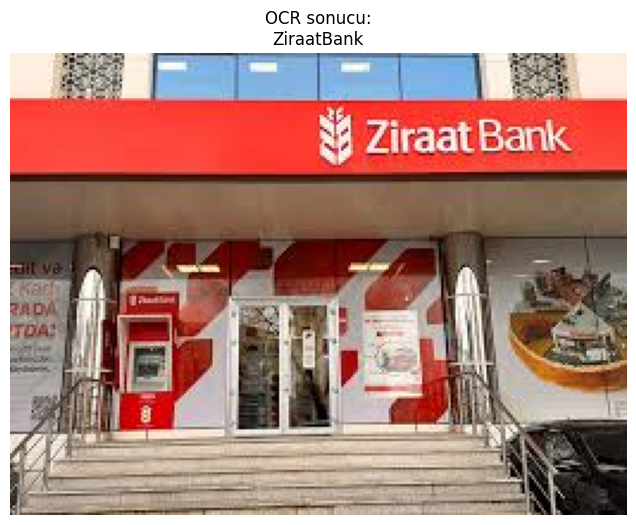

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


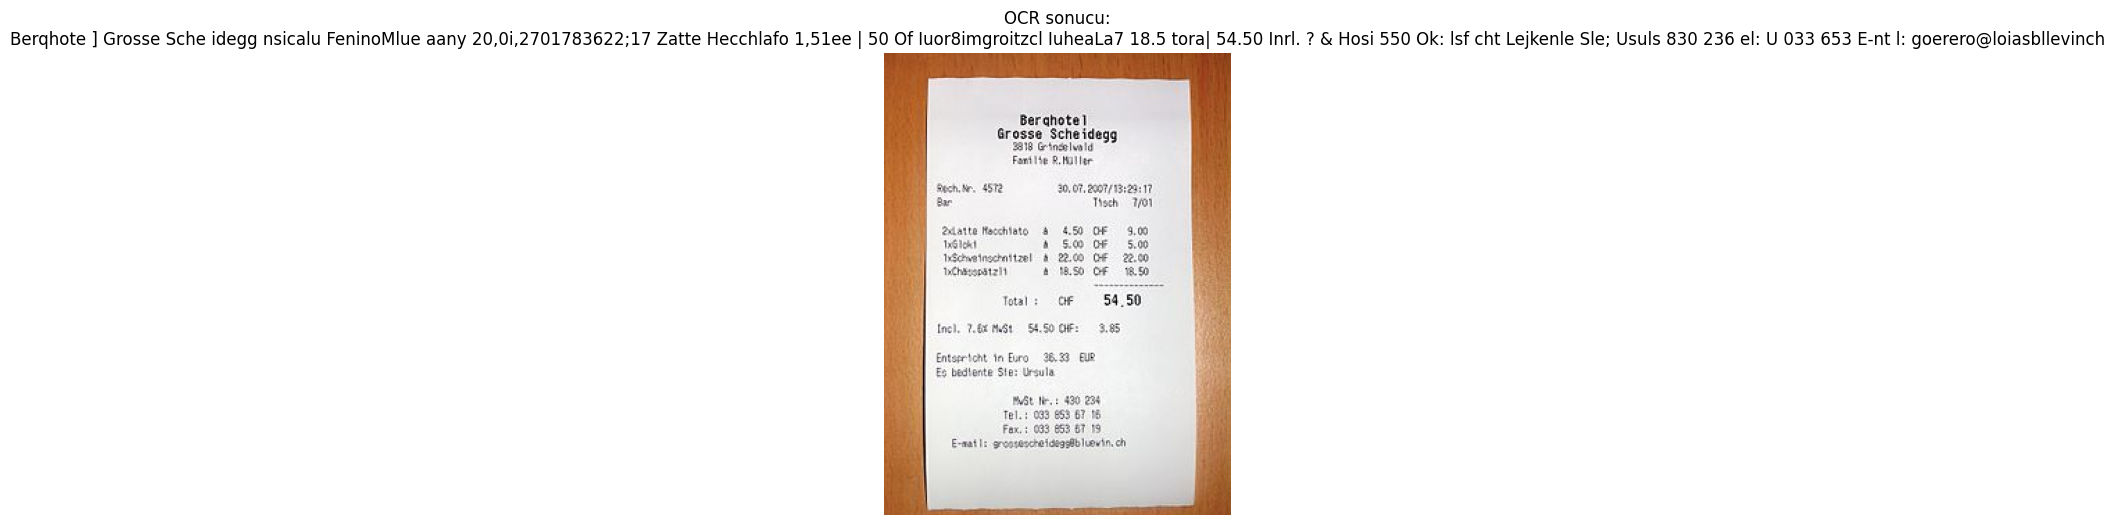

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


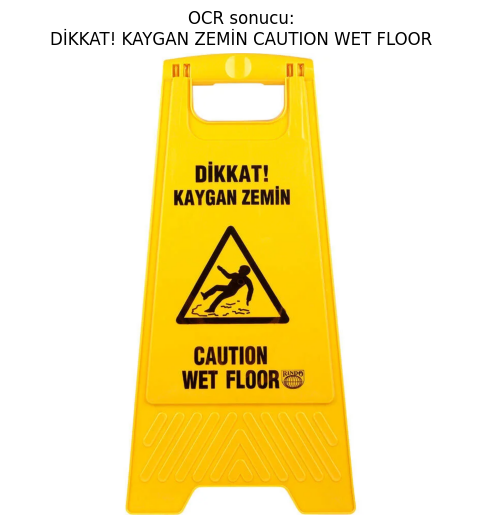

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


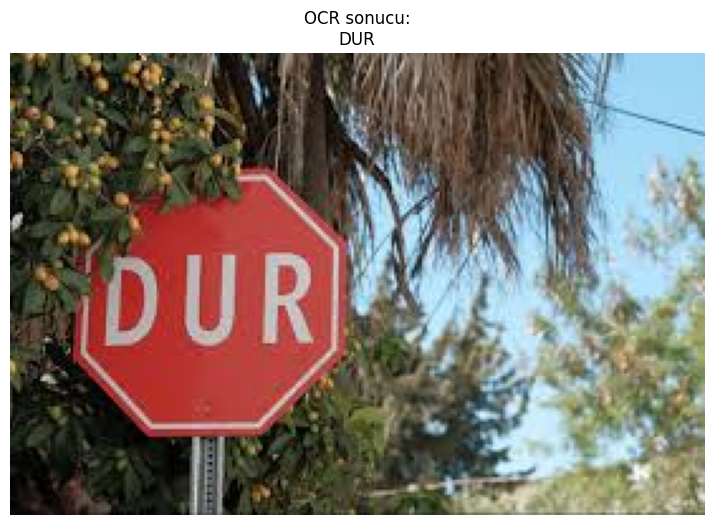

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


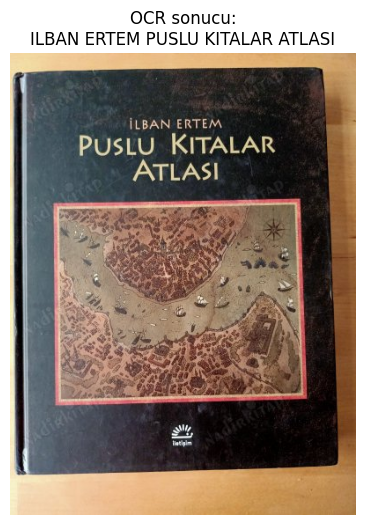

In [8]:
import easyocr
from PIL import Image
import matplotlib.pyplot as plt

# OCR reader
reader = easyocr.Reader(['tr', 'en'])

ocr_results = {}

for img_name in img_names:
    # Görseli aç
    image = Image.open(img_name).convert("RGB")

    # OCR çalıştır
    result = reader.readtext(img_name)
    ocr_text = " ".join([res[1] for res in result])
    ocr_results[img_name] = ocr_text

    # Görseli göster ve altına OCR metni yazdır
    plt.figure(figsize=(10,6))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"OCR sonucu:\n{ocr_text}", fontsize=12)
    plt.show()

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

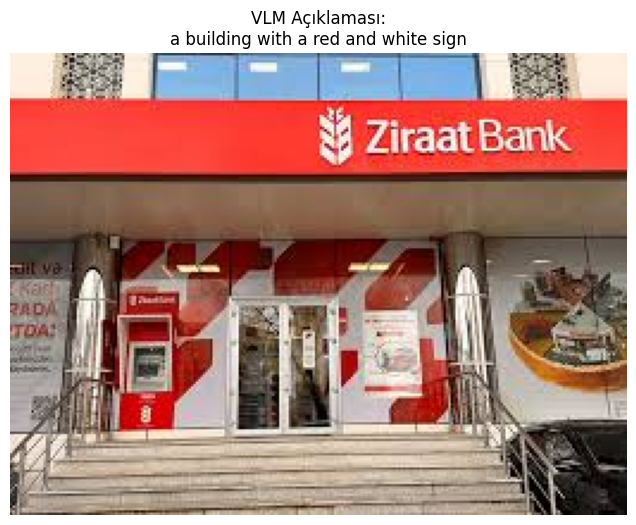

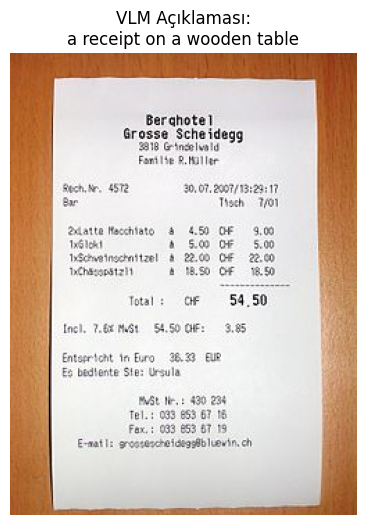

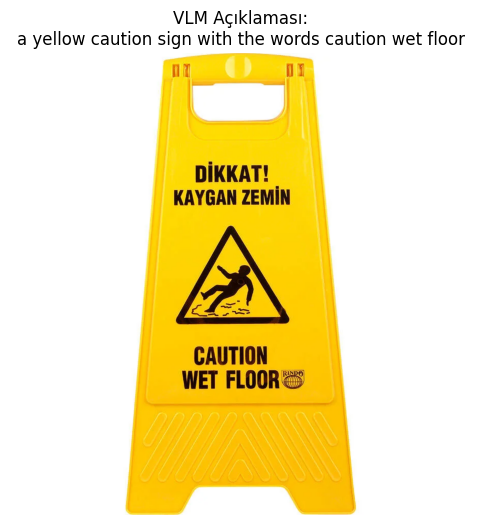

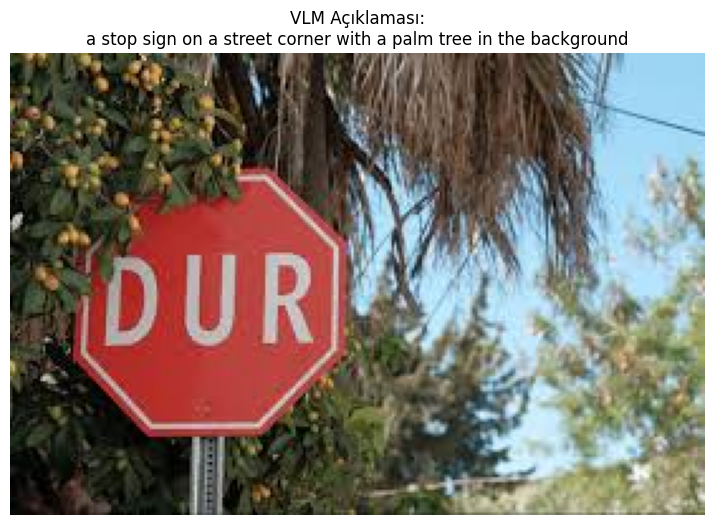

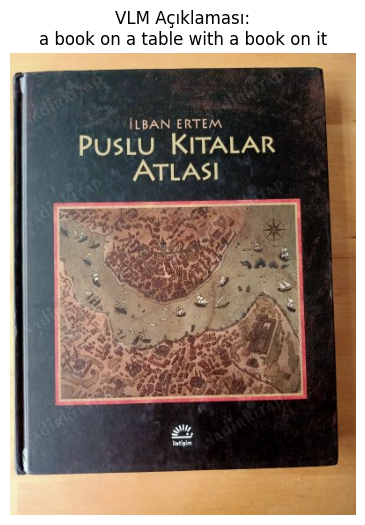

In [10]:
!pip install transformers torch torchvision pillow

from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

# Model ve processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

vlm_results = {}

for img_name in img_names:
    image = Image.open(img_name).convert("RGB")

    # Görseli işlemden geçir
    inputs = processor(images=image, return_tensors="pt")
    out = model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)

    vlm_results[img_name] = caption

    # Görsel ve açıklamayı göster
    plt.figure(figsize=(10,6))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"VLM Açıklaması:\n{caption}", fontsize=12)
    plt.show()

In [11]:
# Her görsel için birleşik sonuçları saklayacak sözlük
combined_results = {}

for img_name in img_names:
    combined_results[img_name] = {
        "ocr_text": ocr_results[img_name],
        "vlm_context": vlm_results[img_name],
        "combined": f"Görsel bir '{vlm_results[img_name]}' ve üzerinde şu metinler var: {ocr_results[img_name]}"
    }

# Örnek olarak birleşik yorumları yazdırma
for img_name in img_names:
    print(f"Görsel: {img_name}")
    print("Birleşik yorum:")
    print(combined_results[img_name]['combined'])
    print("-"*50)

Görsel: ziraat.jpeg
Birleşik yorum:
Görsel bir 'a building with a red and white sign' ve üzerinde şu metinler var: ZiraatBank
--------------------------------------------------
Görsel: recipt (2).jpg
Birleşik yorum:
Görsel bir 'a receipt on a wooden table' ve üzerinde şu metinler var: Berqhote ] Grosse Sche idegg nsicalu FeninoMlue aany 20,0i,2701783622;17 Zatte Hecchlafo 1,51ee | 50 Of Iuor8imgroitzcl IuheaLa7 18.5 tora| 54.50 Inrl. ? & Hosi 550 Ok: lsf cht Lejkenle Sle; Usuls 830 236 el: U 033 653 E-nt l: goerero@loiasbllevinch
--------------------------------------------------
Görsel: kaygan_zemin (2).webp
Birleşik yorum:
Görsel bir 'a yellow caution sign with the words caution wet floor' ve üzerinde şu metinler var: DİKKAT! KAYGAN ZEMİN CAUTION WET FLOOR
--------------------------------------------------
Görsel: levha (2).jpeg
Birleşik yorum:
Görsel bir 'a stop sign on a street corner with a palm tree in the background' ve üzerinde şu metinler var: DUR
-----------------------------

In [12]:
for img_name in img_names:
    print(f"Görsel: {img_name}")
    print("Sadece OCR ile:")
    print(combined_results[img_name]['ocr_text'])
    print("OCR + VLM birleşik analiz:")
    print(combined_results[img_name]['combined'])
    print("="*70)

Görsel: ziraat.jpeg
Sadece OCR ile:
ZiraatBank
OCR + VLM birleşik analiz:
Görsel bir 'a building with a red and white sign' ve üzerinde şu metinler var: ZiraatBank
Görsel: recipt (2).jpg
Sadece OCR ile:
Berqhote ] Grosse Sche idegg nsicalu FeninoMlue aany 20,0i,2701783622;17 Zatte Hecchlafo 1,51ee | 50 Of Iuor8imgroitzcl IuheaLa7 18.5 tora| 54.50 Inrl. ? & Hosi 550 Ok: lsf cht Lejkenle Sle; Usuls 830 236 el: U 033 653 E-nt l: goerero@loiasbllevinch
OCR + VLM birleşik analiz:
Görsel bir 'a receipt on a wooden table' ve üzerinde şu metinler var: Berqhote ] Grosse Sche idegg nsicalu FeninoMlue aany 20,0i,2701783622;17 Zatte Hecchlafo 1,51ee | 50 Of Iuor8imgroitzcl IuheaLa7 18.5 tora| 54.50 Inrl. ? & Hosi 550 Ok: lsf cht Lejkenle Sle; Usuls 830 236 el: U 033 653 E-nt l: goerero@loiasbllevinch
Görsel: kaygan_zemin (2).webp
Sadece OCR ile:
DİKKAT! KAYGAN ZEMİN CAUTION WET FLOOR
OCR + VLM birleşik analiz:
Görsel bir 'a yellow caution sign with the words caution wet floor' ve üzerinde şu metin